In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
class citizen:
    def __init__(self, ID, money):
        self.ID = ID
        self.money = money
    def __str__(self):
        return "ID: {}; money: {}".format(self.ID, self.money)

#Совершает розыгрыш между двумя горожанами
def makeDeal(c1, c2):
    bank = 0
    if c1.money > 0:
        bank+=1
        c1.money-=1
    if c2.money > 0:
        bank+=1
        c2.money-=1
    if bank == 0:
        return
    else:
        pr = random.random();
        if (pr > 0.499):
            c1.money+=bank
        else:
            c2.money+=bank

#Случайно выбирает двух жителей из города            
def selectTwoCitizens(listOfCitizens):
    result = np.empty(0)
    if (listOfCitizens.shape[0]>2):
        result = np.random.choice(listOfCitizens, 2, False)
        return result
    elif (listOfCitizens.shape[0]==2):
        result = listOfCitizens
        return result
    else:
        return result

#Делит жителей на пары и проводит в каждой паре розыгрыш
def makeDealsInPairs(listOfCitizens):
    localCopy = np.copy(listOfCitizens)
    for i in range(listOfCitizens.shape[0]//2):
        currentPair = selectTwoCitizens(localCopy)
        if (currentPair.shape[0] == 2):
            makeDeal(currentPair[0], currentPair[1])
            index = np.where(localCopy == currentPair[0])
            localCopy = np.delete(localCopy, index)
            index = np.where(localCopy == currentPair[1])
            localCopy = np.delete(localCopy, index)

#Строит текущее распределение
def makeDistribution(listOfCitizens, initMoney):
    distribution = np.zeros((listOfCitizens.shape[0]*initMoney))
    for c in listOfCitizens:
        distribution[c.money]+=1
    distribution=(1/listOfCitizens.shape[0])*distribution
    return distribution

#Строит равновесное распределение
def makeCStar(listOfCitizens, initMoney):
    C = 1 / initMoney
    cstar = np.zeros((listOfCitizens.shape[0]*initMoney))
    for i in range(cstar.shape[0]):
        cstar[i] = C * math.exp(-i/initMoney)
    return cstar

In [6]:
#Считает mixingTime для одного значения количества жителей города. Заканчивает расчёт сам
def makeOneRealization(citizenNum, initMoney, sigma):
    mixingTime = 0
    #создаю и заселяю город, раздаю всем деньги
    city = np.empty((citizenNum), dtype = object)
    for i in range(city.shape[0]):
        city[i] = citizen(i, initMoney)
    #считаю равновесную кривую
    cs = makeCStar(city, initMoney)
    #Условие остановки расчёта
    stop = False
    #Основной цикл
    while stop == False:
        #Разбиваю всех на пары, совершаю сделку в каждой паре
        makeDealsInPairs(city)
        #Строю текущее распределение
        c = makeDistribution(city, initMoney)
        #Расчёт условия остановки
        #Евклидово расстояние между текущей и равновесной кривой
        diff = c - cs
        left = 0
        for i in range(diff.shape[0]):
            left+=(diff[i])**2
        left = np.sqrt(left)
        #Правая часть формулы
        right = ((math.log(1/sigma))**(1/2))/(citizenNum**(1/2))
        if (left < right):
            stop = True
        else:
            stop = False
        mixingTime+=1
    return mixingTime, c, cs

#Считает mixingTime для одного значения количества жителей города. Заканчивает расчёт когда пользователь ввёл символ q
def makeOneRealizationPB(citizenNum, initMoney, sigma):
    mixingTime = 0
    sym = ''
    #создаю и заселяю город, раздаю всем деньги
    city = np.empty((citizenNum), dtype = object)
    for i in range(city.shape[0]):
        city[i] = citizen(i, initMoney)
    #считаю равновесную кривую
    cs = makeCStar(city, initMoney)
    #Условие остановки расчёта
    stop = False
    #Основной цикл
    while sym != 'q':
        #Разбиваю всех на пары, совершаю сделку в каждой паре
        makeDealsInPairs(city)
        #Строю текущее распределение
        c = makeDistribution(city, initMoney)
        #Расчёт условия остановки
        #Евклидово расстояние между текущей и равновесной кривой
        left = math.dist(c,cs)
        #Правая часть формулы
        right = ((math.log(1/sigma))**(1/2))/(citizenNum**(1/2))
        if (left < right):
            stop = True
        else:
            stop = False
        
        mixingTime+=1
        print("||c-cs||L2 "+str(left))
        print("right "+str(right))
        print(mixingTime)
        plt.plot(c)
        plt.plot(cs)
        plt.show()
        sym = input() 

In [217]:
#Основной блок с расчётом
numDays = 0
sigma = 0.1
citizenNum = 10
initMoney = 10

TFromN = []

while citizenNum < 1000:
    res = makeOneRealization(citizenNum, initMoney, sigma)
    t = res[0]
    cCur = res[1]
    cStar = res[2]
    TFromN.append([citizenNum, t])
    print([citizenNum, t])
    citizenNum += 10

[10, 8]
[20, 19]
[30, 28]
[40, 48]
[50, 46]
[60, 43]
[70, 54]
[80, 44]
[90, 51]
[100, 48]
[110, 56]
[120, 69]
[130, 50]
[140, 56]
[150, 74]
[160, 56]
[170, 53]
[180, 74]
[190, 88]
[200, 69]
[210, 66]
[220, 79]
[230, 68]
[240, 78]
[250, 61]
[260, 72]
[270, 100]
[280, 88]
[290, 82]
[300, 113]
[310, 85]
[320, 77]
[330, 91]
[340, 102]
[350, 111]
[360, 83]
[370, 81]
[380, 95]
[390, 121]
[400, 109]
[410, 83]
[420, 97]
[430, 114]
[440, 130]
[450, 140]
[460, 111]
[470, 129]
[480, 104]
[490, 120]
[500, 112]
[510, 131]
[520, 122]
[530, 119]
[540, 134]
[550, 131]
[560, 104]
[570, 108]
[580, 138]
[590, 116]
[600, 132]
[610, 131]
[620, 130]
[630, 113]
[640, 116]
[650, 133]
[660, 106]
[670, 107]
[680, 162]
[690, 141]
[700, 149]
[710, 141]
[720, 119]
[730, 174]
[740, 132]
[750, 134]
[760, 148]
[770, 189]
[780, 147]
[790, 156]
[800, 160]
[810, 209]
[820, 165]
[830, 152]
[840, 120]
[850, 141]
[860, 192]
[870, 196]
[880, 147]
[890, 189]
[900, 154]
[910, 173]
[920, 136]
[930, 180]
[940, 153]
[950, 197]
[

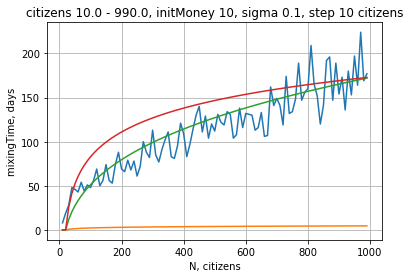

In [221]:
#Блок с отрисовкой
x = np.zeros(len(TFromN)) # N
y = np.zeros(len(TFromN)) # фактическая функция t = t(N), синяя кривая
l = np.zeros(len(TFromN)) #t = lnN, рыжая кривая
l1 = np.zeros(len(TFromN)) #t = 15*((i)**(1/5))*math.log(i), зелёная кривая
l2 = np.zeros(len(TFromN)) #t = 1.5*(initMoney**(7/5))*math.log(i), красная кривая
for i in range(len(TFromN)):
    x[i] = TFromN[i][0]
    y[i] = TFromN[i][1]
    if i!=0:
        l[i] = math.log(i)
        l1[i] = 15*((i)**(1/5))*math.log(i)
        l2[i] = 1.5*(initMoney**(7/5))*math.log(i)
plt.plot(x, y)
plt.plot(x, l)
plt.plot(x, l1)
plt.plot(x, l2)
plt.grid()
plt.title("citizens "+str(x[0])+" - "+str(x[x.shape[0]-1])+", initMoney "+str(initMoney)+", sigma "+str(sigma)+", step 10 citizens")
plt.xlabel("N, citizens")
plt.ylabel("mixingTime, days")
plt.show()